In [ ]:
# Menghubungkan google drive dengan colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mengimpor library yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Membaca dataset
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Praktikum 5/data/Iris.csv')

# Menampilkan 5 data pertama
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Menampilkan informasi detail dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# Cek missing value
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
# Cek duplikat
df.duplicated().sum()

np.int64(0)

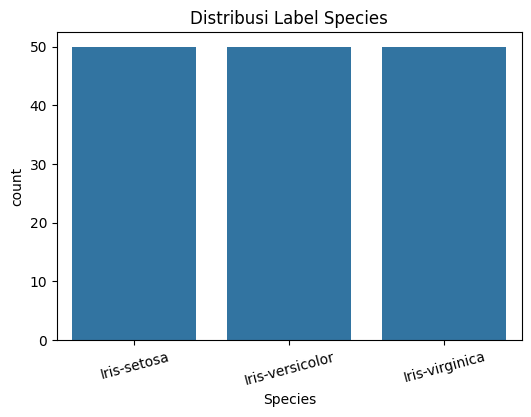

In [ ]:
# Visualisasi distribusi label target (Species)
plt.figure(figsize=(6, 4))
sns.countplot(x='Species', data=df)
plt.title('Distribusi Label Species')
plt.xticks(rotation=15)
plt.show()

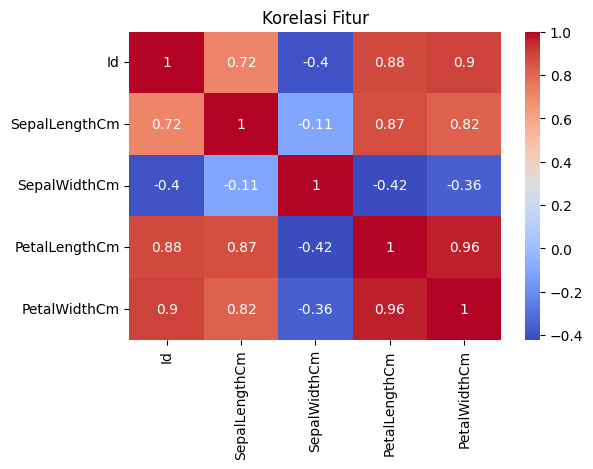

In [ ]:
# Heatmap korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

In [ ]:
# Fitur (X)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
# Target (y)
y = df['Species']

# Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

len(X_train), len(X_test)

(120, 30)

In [ ]:
# Membangun model dt (Decision Tree)
dt = DecisionTreeClassifier(
    criterion='gini', max_depth=3, random_state=42
)

# Melatih model
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
# Model mencoba memprediksi
y_pred = dt.predict(X_test)

# Mengevaluasi model
print("Akurasi Model : ", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))

Akurasi Model :  96.67 %

Confusion Matrix :
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



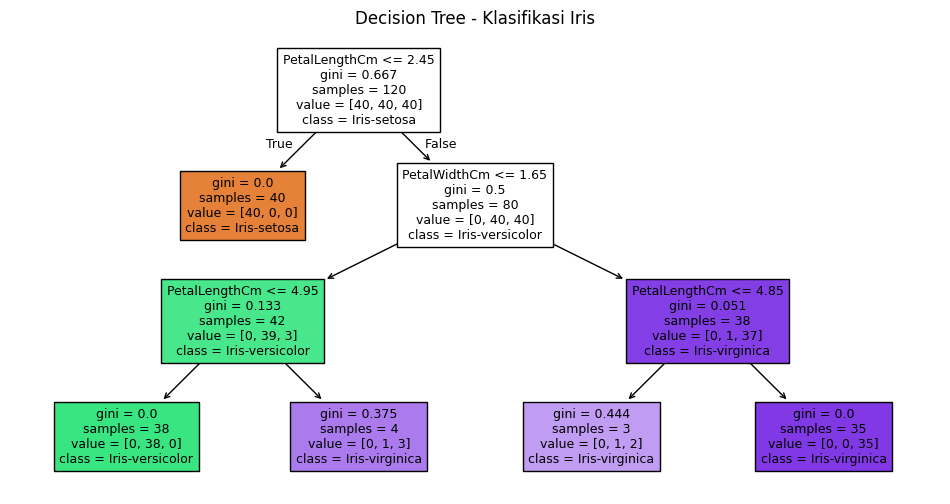

In [19]:
# Visualisasi model
plt.figure(figsize=(12, 6))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=y.unique(),
    filled=True,
    fontsize=9
)
plt.title('Decision Tree - Klasifikasi Iris')
plt.show()

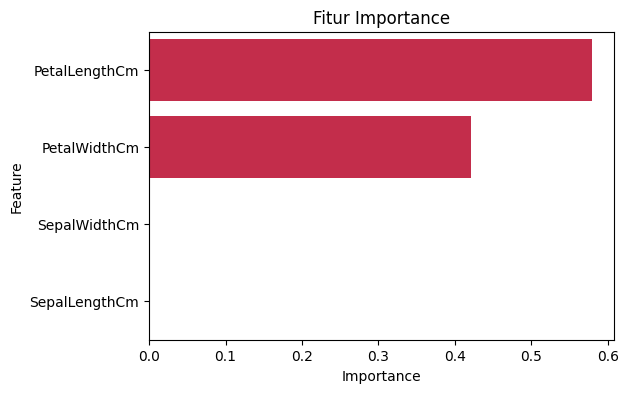

In [ ]:
# Mengetahui fitur yang penting atau berpengaruh
importance = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(x=importance, y=importance.index, color='crimson')
plt.title('Fitur Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Mencari nilai max_depth terbaik
scores = {}
for d in range(2, 7):
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    scores[d] = accuracy_score(y_test, m.predict(X_test))

scores
best_d = max(scores, key=scores.get)
print("Best max_depth :", best_d, "| Accuracy :", round(scores[best_d]*100,2), "%")

Best max_depth : 3 | Accuracy : 96.67 %
